In [1]:
import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/kjames/Desktop/ai/stats_py_ai_ml/data/nyc.csv')

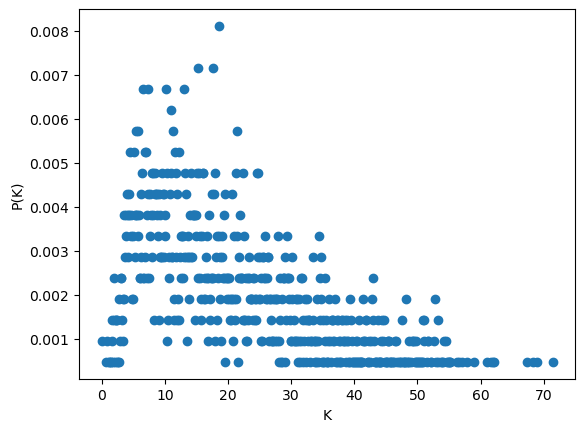

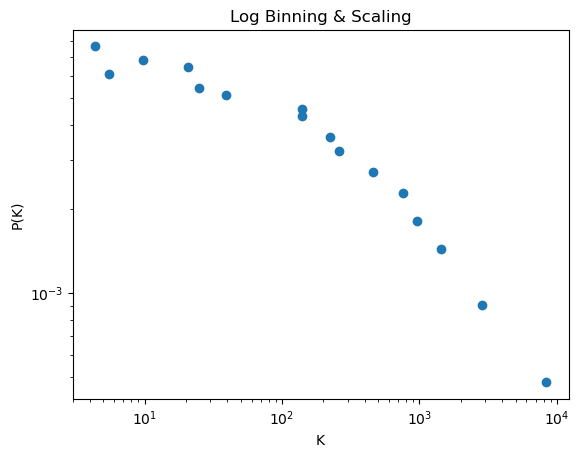

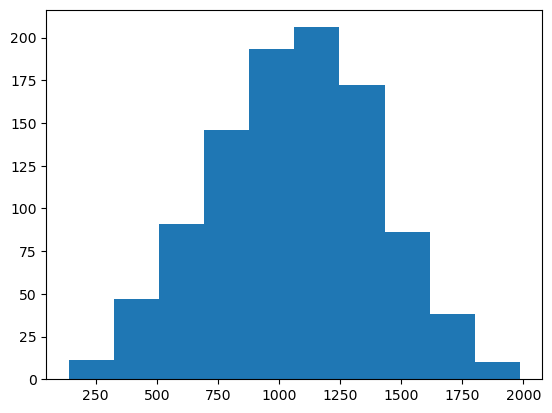

-0.7351623386625886
-0.7328779003408962


In [2]:
jedi = stats.formulas(df)
jedi.set_x_y('Poverty','ChildPoverty')
jedi.pdf_linearBinning('Poverty')
jedi.pdf_log_binning('Poverty')
jedi.ctl('Poverty',1000)
jedi.get_corr('Poverty','Income')
print(df['Poverty'].corr(df['Income']))

In [3]:
jedi.init_knn(5, ['Black', 'White'])

In [4]:
random_node = jedi.nodeList[np.random.randint(0, jedi.n)]
random_node.idx


686

In [5]:
graph = jedi.create_graph()
print('len:',len(graph))
print('each dot as obj:', graph[(random_node.x,random_node.y)])

len: 2070
each dot as obj: [<stats.node object at 0x7f7a93d2ae50>]


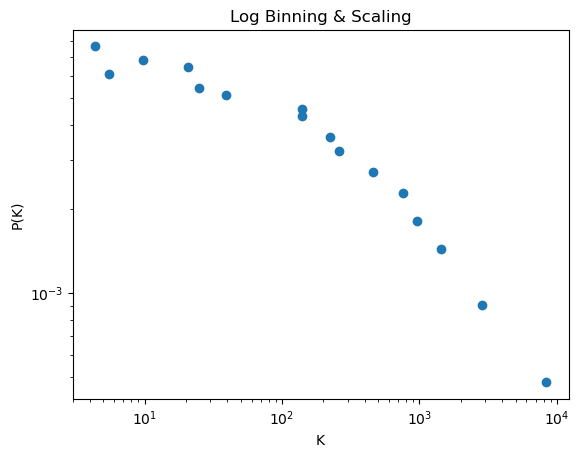

In [6]:
normGraph = jedi.scatterGraphNorm
norm_x, norm_y = normGraph[0], normGraph[1]
jedi.pdf_log_binning([jedi.x, jedi.y])


In [7]:
import collections
collections.Counter(norm_x)

Counter({0.16359918200409: 2,
         0.31390593047034765: 1,
         0.3312883435582822: 3,
         0.2965235173824131: 3,
         0.3179959100204499: 2,
         0.3732106339468303: 4,
         0.19325153374233128: 3,
         0.31901840490797545: 1,
         0.26789366053169733: 4,
         0.7300613496932516: 1,
         0.2515337423312884: 4,
         0.3128834355828221: 1,
         0.26482617586912066: 2,
         0.43660531697341515: 2,
         0.16462167689161555: 6,
         0.11042944785276075: 2,
         0.23926380368098157: 4,
         0.48057259713701433: 1,
         0.35991820040899797: 2,
         0.37423312883435583: 3,
         0.24335378323108386: 3,
         0.3762781186094069: 3,
         0.17484662576687118: 6,
         0.28732106339468305: 2,
         0.27300613496932513: 2,
         0.5184049079754601: 2,
         0.2147239263803681: 4,
         0.2494887525562372: 2,
         0.23619631901840493: 3,
         0.21881390593047034: 3,
         0.7883435582822

In [8]:
#testNode = stats.node(24,29,0,df,['TestNode'])
val1 = jedi.nodeList[0]
print(val1.x, val1.y)
jedi.predict([val1])


16.0 2.3


[(0.0, (16.0, 2.3)),
 (0.2236, (16.1, 2.1)),
 (0.4123, (16.1, 1.9)),
 (0.4472, (15.8, 2.7)),
 (0.5831, (15.5, 2.0))]

In [9]:
jedi.dist(val1,val1)

0.0

In [10]:
#jedi.df['County'] = jedi.vector_to_ints('County')
jedi.df.head(5)

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2
5,36005002000,Bronx,Bronx,8516,3301,5215,61.1,1.6,31.1,0.3,...,4.3,1.0,0.0,46.0,2508,71.0,21.3,7.7,0.0,17.2


In [11]:
testNode = stats.node(24,29,0,df,['TestNode'],4)
jedi.init_knn(5,['White','Black'])
jedi.insert_knn(testNode)
res = jedi.predict([testNode])
for item in res:
   
    _,x_y = item
    edge = jedi.adjList[x_y]
    print(edge.x, edge.y, edge.label)
    print('')
    


24.0 29.7 Richmond

23.7 29.8 Richmond

24.6 29.9 Queens

23.9 30.3 Queens

24.3 25.3 Queens



In [12]:
x = [x for x in range(100)]
y = [y+1 for y in range(100)]


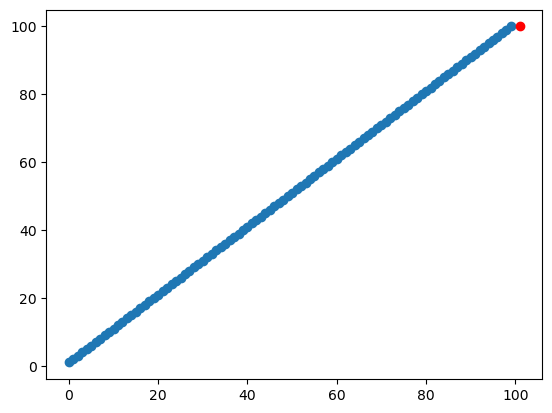

101.0

In [13]:
# y = mx + b
jedi.linear_regression(x,y,100)

In [106]:
n = 100 # length of the vectors
corr = 0.56 # desired correlation

# Generate the first random vector from a normal distribution
x = np.random.normal(loc=0, scale=1, size=n)

# Generate the second random vector from a normal distribution
y = np.random.normal(loc=0, scale=1, size=n)

# Create a third vector with the desired correlation
z = (y + corr) * np.std(x) * (x - np.mean(x))

np.corrcoef(y,z)

array([[1.        , 0.15458543],
       [0.15458543, 1.        ]])

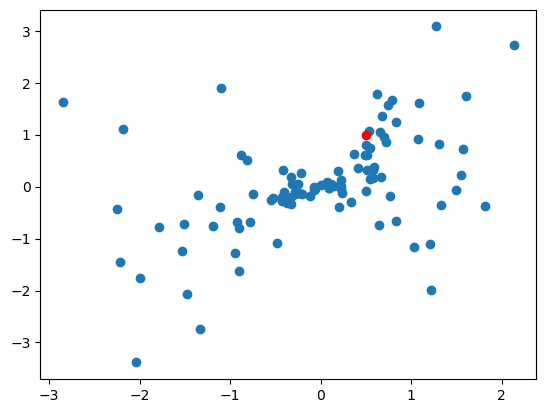

0.5016158937972676

In [107]:
jedi.linear_regression(x,z,1)